In [15]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,10000
sigma = 0.1
N = 50
C = 0.6
rho=0.9
dim = 1
actf="tanh"
#actf="identity"
torch.manual_seed(0)
u_asym = torch.rand(dim, Two + Ttrain)
u_sym = 2 * u_asym - 1

esn = ESN.ESN_mult(N, rho=rho, dim=dim,sigma=sigma,p=0.5,pin=0.1)
esn_U = ESN.ESN_mult(N, uC=C, dim=dim,sigma=sigma,p=0.5,pin=0.1)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf=actf)
Xwo_U = esn_U.run_washout(u_sym, Two, actf=actf)
print("runtime :",time.time()-st)

runtime : 1.4017441272735596


In [2]:
"""
_,S,_=torch.linalg.svd(Xwo)
_,S_U,_=torch.linalg.svd(Xwo_U)

## PCA
_,S,_=torch.pca_lowrank(Xwo,q=51,center=False)
_,S_U,_=torch.pca_lowrank(Xwo_U,q=51,center=False)

x=np.arange(S[1:].shape[0])
y=S[1:].cpu().numpy()
y_U=S_U[1:].cpu().numpy()
plt.figure(figsize=(12,8))
plt.plot(x,y,label="random")
plt.plot(x,y_U,label="unitary")
plt.legend()
plt.grid(True)
plt.show()
"""


'\n_,S,_=torch.linalg.svd(Xwo)\n_,S_U,_=torch.linalg.svd(Xwo_U)\n\n## PCA\n_,S,_=torch.pca_lowrank(Xwo,q=51,center=False)\n_,S_U,_=torch.pca_lowrank(Xwo_U,q=51,center=False)\n\nx=np.arange(S[1:].shape[0])\ny=S[1:].cpu().numpy()\ny_U=S_U[1:].cpu().numpy()\nplt.figure(figsize=(12,8))\nplt.plot(x,y,label="random")\nplt.plot(x,y_U,label="unitary")\nplt.legend()\nplt.grid(True)\nplt.show()\n'

In [3]:
maxdd=[[1,50],[2,30],[3,20],[4,10],[5,10]]
st = time.time()
tar_info = ESN.make_targets(u_sym,maxdd,Two=Two)
print("target :",time.time()-st)

basis table creation:0.001 s
1 degree:50 target functions
2 degree:465 target functions
3 degree:1540 target functions
4 degree:715 target functions
5 degree:2002 target functions
target : 2.3106307983398438


In [25]:
st = time.time()
raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,tar_info.tar_f,sur_sets=200,ret_all=True,thr_scale=1.2,mean_normalization=True)
print("ipc time:",time.time()-st)
print(torch.sum(thr))
capacities = thr

dgrs = torch.tensor(tar_info.degree)
IPC=torch.sum(capacities)
c_1st=torch.sum(capacities[torch.argwhere(dgrs==1)])
c_2nd=torch.sum(capacities[torch.argwhere(dgrs==2)])
c_3rd=torch.sum(capacities[torch.argwhere(dgrs==3)])
c_4th=torch.sum(capacities[torch.argwhere(dgrs==4)])
c_5th=torch.sum(capacities[torch.argwhere(dgrs==5)])
print("1st order ipc:",float(c_1st))
print("2nd order ipc:",float(c_2nd))
print("3rd order ipc:",float(c_3rd))
print("4th order ipc:",float(c_4th))
print("5th order ipc:",float(c_5th))
print("total ipc:",float(IPC))


ipc time: 1.0372211933135986
tensor(51.3491, device='cuda:0')
1st order ipc: 27.435707737029517
2nd order ipc: 0.0
3rd order ipc: 23.678733484539425
4th order ipc: 0.01281956263830882
5th order ipc: 0.22183857394360407
total ipc: 51.34909935815085


In [24]:
st = time.time()
raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,tar_info.tar_f,sur_sets=200,ret_all=True,thr_scale=1.2)
print("ipc time:",time.time()-st)
print(torch.sum(thr))
capacities = thr

dgrs = torch.tensor(tar_info.degree)
IPC=torch.sum(capacities)
c_1st=torch.sum(capacities[torch.argwhere(dgrs==1)])
c_2nd=torch.sum(capacities[torch.argwhere(dgrs==2)])
c_3rd=torch.sum(capacities[torch.argwhere(dgrs==3)])
c_4th=torch.sum(capacities[torch.argwhere(dgrs==4)])
c_5th=torch.sum(capacities[torch.argwhere(dgrs==5)])
print("1st order ipc:",float(c_1st))
print("2nd order ipc:",float(c_2nd))
print("3rd order ipc:",float(c_3rd))
print("4th order ipc:",float(c_4th))
print("5th order ipc:",float(c_5th))
print("total ipc:",float(IPC))

ipc time: 1.0365800857543945
tensor(52.2747, device='cuda:0')
1st order ipc: 27.448520584898503
2nd order ipc: 0.0
3rd order ipc: 24.18391119474367
4th order ipc: 0.047128604592674025
5th order ipc: 0.5951461913460314
total ipc: 52.274706575580886


In [12]:
st = time.time()
_,thr_U,_,rev_U,_ = ESN.calc_capacity(Xwo_U,tar_info.tar_f,sur_sets=200,ret_all=True,thr_scale=1.2)
print("ipc time:",time.time()-st)
cap_U=rev_U

ipc time: 1.0450561046600342


In [14]:
ipc_thr=torch.sum(thr).cpu().numpy()
ipc_rev=torch.sum(rev).cpu().numpy()
ipc_raw=torch.sum(raw).cpu().numpy()
ipc_thr_scl=torch.sum(thr_scl).cpu().numpy()
print(ipc_raw)
print(ipc_rev)
print(ipc_thr)
print(ipc_thr_scl)

80.1916384513585
56.19358005032168
50.740184629244375
50.161489806335034


In [13]:
dgrs = torch.tensor(tar_info.degree)
IPC_U=torch.sum(cap_U)
c_1st_U=torch.sum(cap_U[torch.argwhere(dgrs==1)])
c_2nd_U=torch.sum(cap_U[torch.argwhere(dgrs==2)])
c_3rd_U=torch.sum(cap_U[torch.argwhere(dgrs==3)])
c_4th_U=torch.sum(cap_U[torch.argwhere(dgrs==4)])
c_5th_U=torch.sum(cap_U[torch.argwhere(dgrs==5)])
print("1st order ipc:",float(c_1st_U))
print("2nd order ipc:",float(c_2nd_U))
print("3rd order ipc:",float(c_3rd_U))
print("4th order ipc:",float(c_4th_U))
print("5th order ipc:",float(c_5th_U))
print("total ipc:",float(IPC_U))

1st order ipc: 24.417202749429727
2nd order ipc: 0.10487930900613684
3rd order ipc: 26.163626217201134
4th order ipc: 0.7920041436714038
5th order ipc: 2.9356044545893103
total ipc: 54.41331687389771


## result from original code

# setting
Spectral radius 0.9

iota(sigma) = 0.1

p=0.5 (sparsity for W)

pin=0.1 (sparsity for Win)

{'N': 50, 'T': 1000000, 'Two': 10000, 'Nseed': 200, 'degdelays': [[1, 2000], [2, 300], [3, 50], [4, 30], [5, 15]], 'zerobased': True, 'poly': 'legendre', 'distr': 'uniform', 'thresh': 'N', 'finfo': 2.220446049250313e-16, 'rank': 50}


deg 1 delay 2000 Ctot(d) :27.45346903501059


deg 2 delay 300 Ctot(d) :0.0005147576740859503

deg 3 delay 50 Ctot(d) :22.67197696772705

deg 4 delay 30 Ctot(d) :0.008146459603431709

deg 5 delay 15 Ctot(d) :0.04935086442285615

degs [1 2 3 4 5] Ctot :50.183458084438016 rank 50

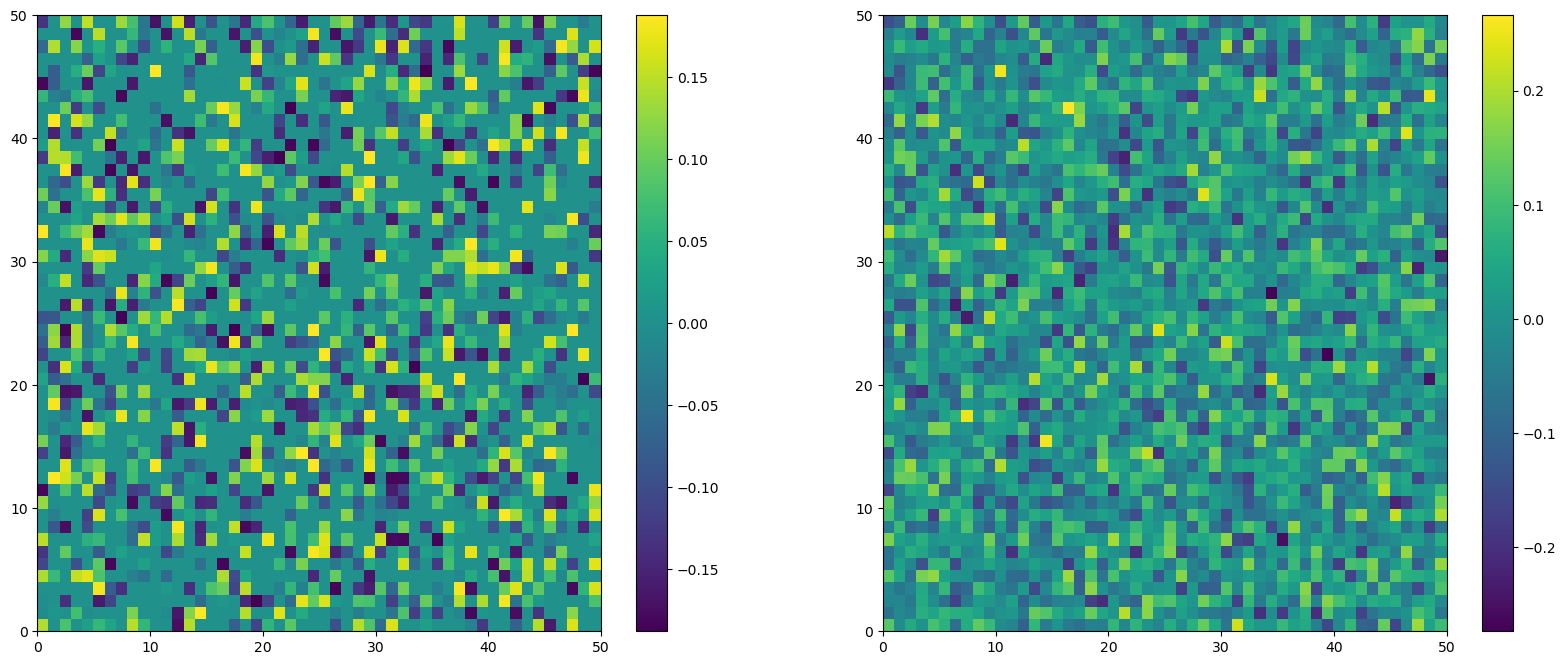

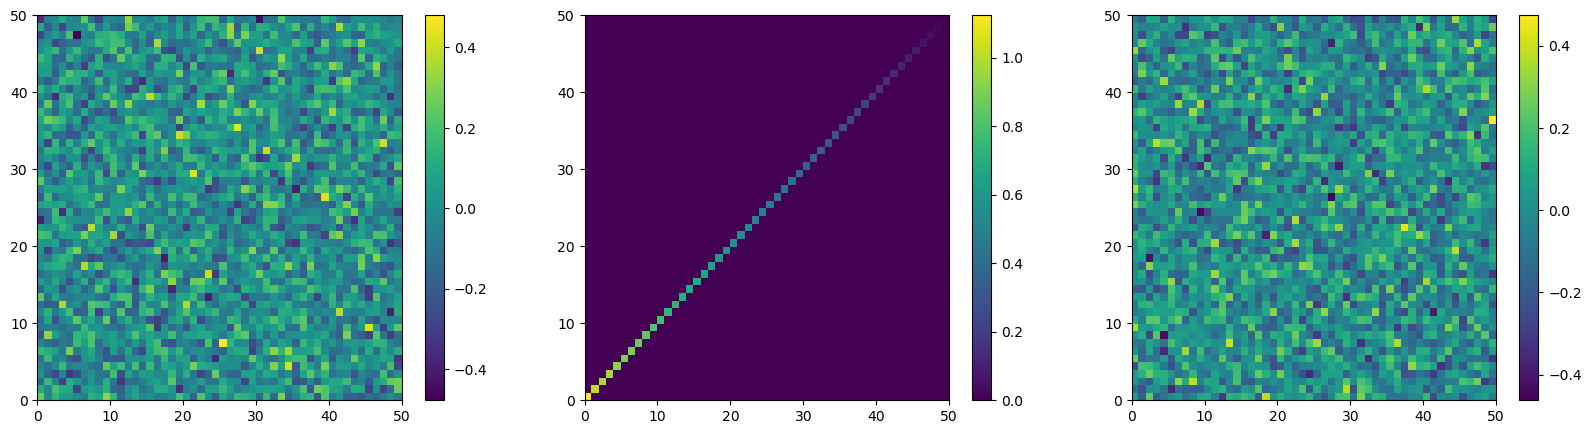

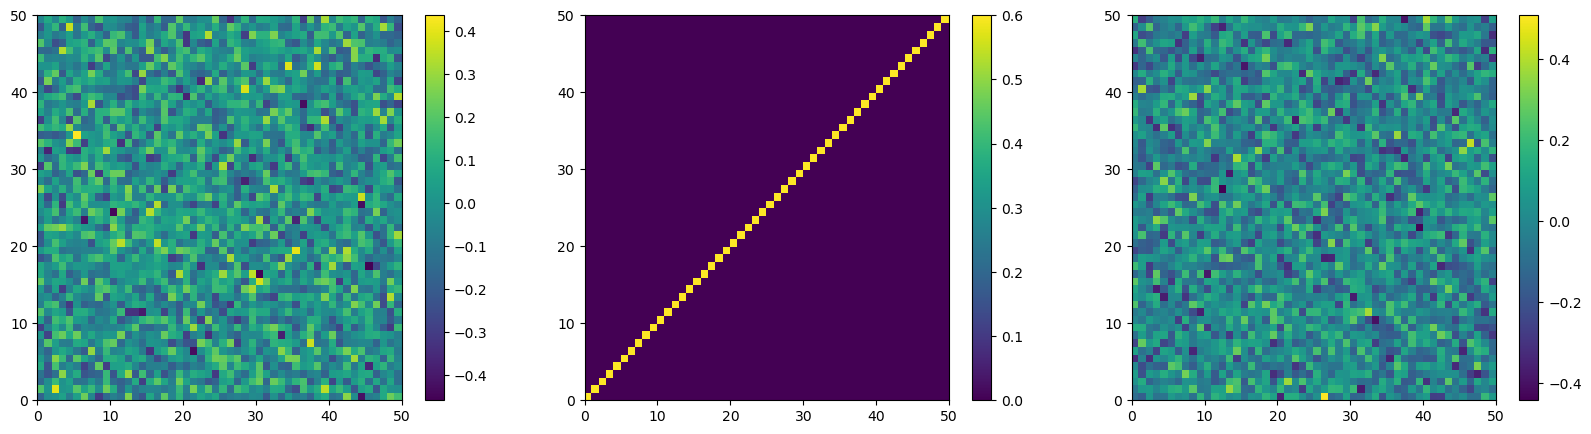

In [40]:
W=esn.get_W()
W_U=esn_U.get_W()
fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(20,8))
c=ax0.pcolor(W.cpu().numpy())
fig.colorbar(c, ax=ax0)
c=ax1.pcolor(W_U.cpu().numpy())
fig.colorbar(c, ax=ax1)

plt.show()

U, S, Vh = torch.linalg.svd(W)
S=torch.diag(S)
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(20,5))
c=ax0.pcolor(U.cpu().numpy())
fig.colorbar(c, ax=ax0)
c=ax1.pcolor(S.cpu().numpy())
fig.colorbar(c, ax=ax1)
c=ax2.pcolor(Vh.cpu().numpy())
fig.colorbar(c, ax=ax2)

plt.show()

U, S, Vh = torch.linalg.svd(W_U)
S=torch.diag(S)
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(20,5))
c=ax0.pcolor(U.cpu().numpy())
fig.colorbar(c, ax=ax0)
c=ax1.pcolor(S.cpu().numpy())
fig.colorbar(c, ax=ax1)
c=ax2.pcolor(Vh.cpu().numpy())
fig.colorbar(c, ax=ax2)
plt.show()

In [11]:
rhos = torch.linalg.eigvals(W)
rhos_U = torch.linalg.eigvals(W_U)
print(torch.max(torch.abs(rhos)))
print(rhos_U)

tensor(0.6000, device='cuda:0')
tensor([ 0.5993+0.0295j,  0.5993-0.0295j,  0.6000+0.0000j,  0.5846+0.1351j,
         0.5846-0.1351j,  0.5531+0.2325j,  0.5531-0.2325j,  0.5701+0.1872j,
         0.5701-0.1872j,  0.4841+0.3544j,  0.4841-0.3544j,  0.4742+0.3676j,
         0.4742-0.3676j,  0.3722+0.4706j,  0.3722-0.4706j,  0.2940+0.5231j,
         0.2940-0.5231j,  0.2469+0.5468j,  0.2469-0.5468j,  0.1928+0.5682j,
         0.1928-0.5682j,  0.1581+0.5788j,  0.1581-0.5788j,  0.0883+0.5935j,
         0.0883-0.5935j, -0.0453+0.5983j, -0.0453-0.5983j, -0.0845+0.5940j,
        -0.0845-0.5940j, -0.1285+0.5861j, -0.1285-0.5861j, -0.2428+0.5487j,
        -0.2428-0.5487j, -0.2191+0.5586j, -0.2191-0.5586j, -0.3686+0.4734j,
        -0.3686-0.4734j, -0.4014+0.4459j, -0.4014-0.4459j, -0.4748+0.3669j,
        -0.4748-0.3669j, -0.5321+0.2773j, -0.5321-0.2773j, -0.5715+0.1828j,
        -0.5715-0.1828j, -0.5968+0.0619j, -0.5968-0.0619j, -0.5995+0.0235j,
        -0.5995-0.0235j, -0.6000+0.0000j], device='cuda:

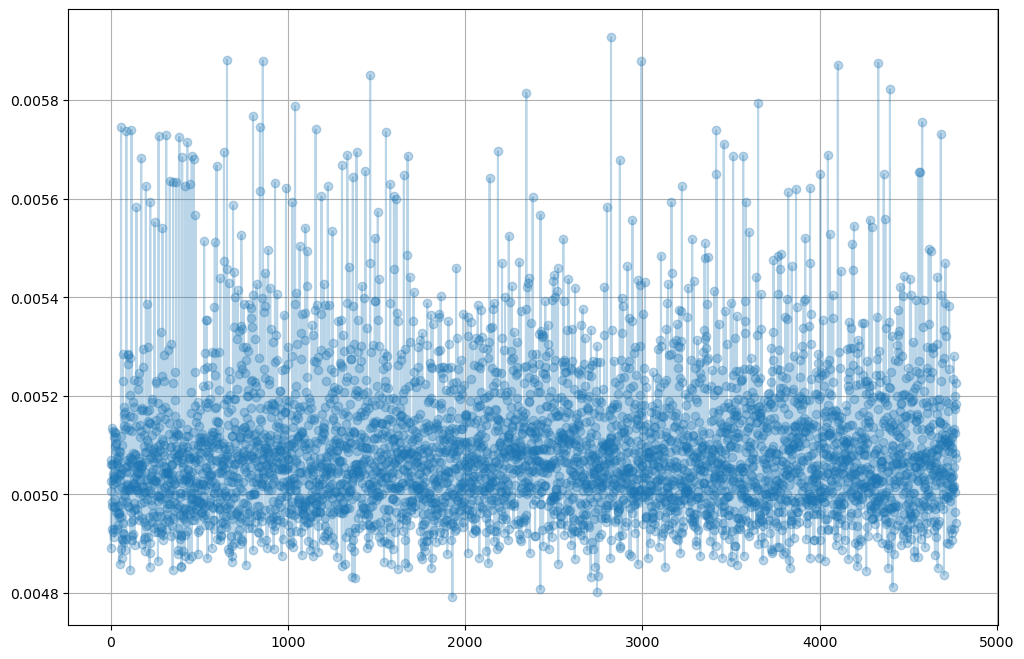

In [38]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(sur.shape[0]),sur.cpu().numpy(),"-o",alpha=0.3)
#plt.hlines(y=mc_sur.cpu().numpy(),xmax=0,xmin=sur.shape[0],color="red")
plt.grid(True)


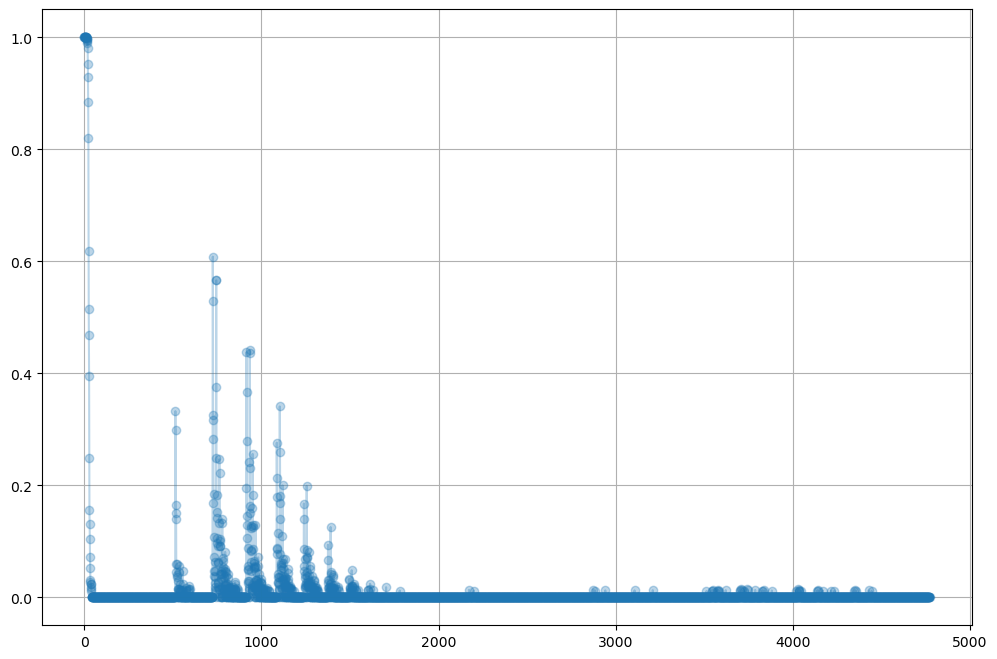

In [20]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(sur.shape[0]),thr.cpu().numpy(),"-o",alpha=0.3)
plt.grid(True)

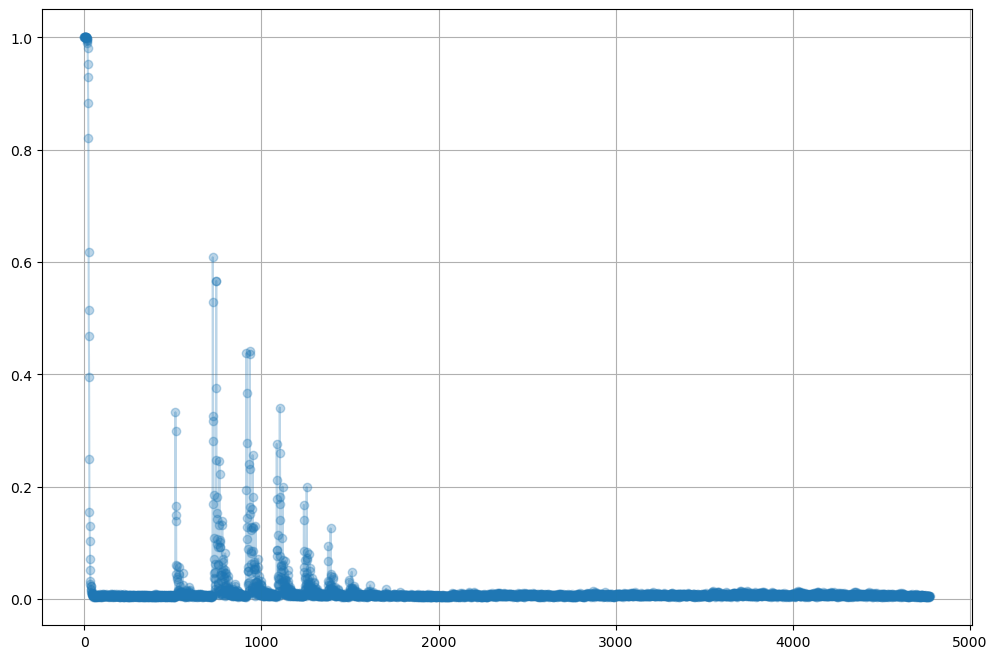

In [19]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(sur.shape[0]),raw.cpu().numpy(),"-o",alpha=0.3)
plt.grid(True)